In [2]:
pip install tweepy


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re                         
plt.style.use('fivethirtyeight')

In [6]:
df = pd.read_excel("c:/users/waelr/desktop/i-aps/KII_GOAL.xlsx")

In [7]:
df 

,Questions,Answers
0,Project specific question on the activities 1 \nWhat is the current status of the activities? Which activities do you implement in the field currently? Were there any delays?,"All activities are carried out as required (operating stations - supplying fuel and oils - periodic fuel inventory - following up on maintenance - and following up on infrastructure projects ......)\nDuring the Covid-19 pandemic, field visits to stations were reduced as much as possible and some activities were pursued via WhatsApp, but this did not affect the quality of work and implementation of activities within the required time, meaning there is no delay.\n"
1,Project specific question on the activities 2 \nHow do you measure the water quality? What is the chain of reporting here?,"There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n"
2,"Project specific question on the activities 3 \nHow many Water Unit staff have been trained on operation and maintenance, water pumping data system and complaints response mechanism? How do you select the staff?","Every station has one operating worker or more , and at Hazano station we have three operating employees and a network observer employee (according to the workload within the station and the number of operating hours) In addition to the network monitor, these workers have been trained to record pumping data as well as to receive complaints from beneficiaries and submit them to the organization.\nWhen there is need for employment:\n1) The job (job description with the required qualifications and experience) is announced through the social media pages of the water unit, as well as advertisements in local councils and in front of the mosques.\n2) The applicants place employment applications in a closed box in the water unit.\n3) After the announcement period has ended, the fund will be opened by a committee formed by the water program and the water unit, and job applications that meet the required specifications and qualifications will be selected.\n4) Corresponding councils should be contacted with the names of those invited for interviews and obtaining the approval from the council that there is no objection on any applicant.\n5) A committee from the program and the water unit is formed to conduct oral and written tests for the applicants, and then the marks are collected and the successful one determined.\n6) After that the procedures are completed (conflict of interest, ATC) and obtaining the approvals in order to appoint the successful applicant.\n7) The successful person is notified and the day of commencement is specified. Upon joining the work, the direct email of the program administration is raised.\n"
3,How have the hygiene awareness sessions been tailored to reach different categories of recipients in terms of gender and age? How do you select participants? What is the scope of these sessions regarding Covid-19 specific hygiene measures?,"Health awareness sessions are designed to reach all beneficiaries of all ages and genders and to use all approaches and methods to deliver messages to the community. As for the participants, the schools are targeted with awareness sessions to reach the small age groups for 

In [8]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) ## removing @ mention
    text=re.sub(r'#','',text)             ## removing # symbol
    text=re.sub(r'RT[\s]+','',text)  ## removing RT followed byspace
 
  #df=df[~df.Tweets.str.contains('RT')] --> another way to remove RT
    text=re.sub(r'https?:\/\/\S+','',text) ## removing https
    return text

In [9]:
df['Answers1']=df['Answers'].apply(cleanTxt)   ## applying function
## clean Text
df

,Questions,Answers,Answers1
0,Project specific question on the activities 1 \nWhat is the current status of the activities? Which activities do you implement in the field currently? Were there any delays?,"All activities are carried out as required (operating stations - supplying fuel and oils - periodic fuel inventory - following up on maintenance - and following up on infrastructure projects ......)\nDuring the Covid-19 pandemic, field visits to stations were reduced as much as possible and some activities were pursued via WhatsApp, but this did not affect the quality of work and implementation of activities within the required time, meaning there is no delay.\n","All activities are carried out as required (operating stations - supplying fuel and oils - periodic fuel inventory - following up on maintenance - and following up on infrastructure projects ......)\nDuring the Covid-19 pandemic, field visits to stations were reduced as much as possible and some activities were pursued via WhatsApp, but this did not affect the quality of work and implementation of activities within the required time, meaning there is no delay.\n"
1,Project specific question on the activities 2 \nHow do you measure the water quality? What is the chain of reporting here?,"There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n","There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n"
2,"Project specific question on the activities 3 \nHow many Water Unit staff have been trained on operation and maintenance, water pumping data system and complaints response mechanism? How do you select the staff?","Every station has one operating worker or more , and at Hazano station we have three operating employees and a network observer employee (according to the workload within the station and the number of operating hours) In addition to the network monitor, these workers have been trained to record pumping data as well as to receive complaints from beneficiaries and submit them to the organization.\nWhen there is need for employment:\n1) The job (job description with the required qualifications and experience) is announced through the social media pages of the water unit, as well as advertisements in local councils and in front of the mosques.\n2) The applicants place employment applications in a closed box in the water unit.\n3) After the announcement period has ended, the fund will be opened by a committee formed by the water p

In [26]:
from textblob import TextBlob

In [27]:
## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df['Subjectivity']=df['Answers'].apply(getSubjectivity)
df['Polarity']=df['Answers'].apply(getPolarity)
## show new Dataframe
df

,Questions,Answers,Answers1,Subjectivity,Polarity
0,Project specific question on the activities 1 \nWhat is the current status of the activities? Which activities do you implement in the field currently? Were there any delays?,"All activities are carried out as required (operating stations - supplying fuel and oils - periodic fuel inventory - following up on maintenance - and following up on infrastructure projects ......)\nDuring the Covid-19 pandemic, field visits to stations were reduced as much as possible and some activities were pursued via WhatsApp, but this did not affect the quality of work and implementation of activities within the required time, meaning there is no delay.\n","All activities are carried out as required (operating stations - supplying fuel and oils - periodic fuel inventory - following up on maintenance - and following up on infrastructure projects ......)\nDuring the Covid-19 pandemic, field visits to stations were reduced as much as possible and some activities were pursued via WhatsApp, but this did not affect the quality of work and implementation of activities within the required time, meaning there is no delay.\n",0.400000,0.000000
1,Project specific question on the activities 2 \nHow do you measure the water quality? What is the chain of reporting here?,"There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n","There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n",0.400000,0.200000
2,"Project specific question on the activities 3 \nHow many Water Unit staff have been trained on operation and maintenance, water pumping data system and complaints response mechanism? How do you select the staff?","Every station has one operating worker or more , and at Hazano station we have three operating employees and a network observer employee (according to the workload within the station and the number of operating hours) In addition to the network monitor, these workers have been trained to record pumping data as well as to receive complaints from beneficiaries and submit them to the organization.\nWhen there is need for employment:\n1) The job (job description with the required qualifications and experience) is announced through the social media pages of the water unit, as well as advertisements in local councils and in front of the mosques.\n2) The applicants place employment applications in a closed box in the water unit.\n3) After the announcement period has ended, th

In [28]:
## create function to compute positive, negative and neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
print(df)

                                            Questions  \
0   Project specific question on the activities 1 ...   
1   Project specific question on the activities  2...   
2   Project specific question on the activities 3 ...   
3   How have the hygiene awareness sessions been t...   
4   How do you select participants of the post-ses...   
5   Have you experienced any issues scaling up the...   
6   4.2 A What were the prior studies that were ma...   
7   4.2 How do you receive complaints from the com...   
8   4.4.B Did you sign a code of conduct? Which me...   
9     4.4.D Have you ever received training on PSEA?    
10  4.4.C\nWhat would you do if confronted with a ...   
11  4.5. B  Do project activities/methods of imple...   
12  4.5.C How did you take into consideration any ...   
13   6.4 Which actors (NGOs) do you collaborate with?   
14  6.1 What kind of coordination did you follow t...   
15  6.3 Is project assistance enough to cover need...   
16  6.4 How did you generally e

In [29]:
df 

,Questions,Answers,Answers1,Subjectivity,Polarity,Analysis
0,Project specific question on the activities 1 \nWhat is the current status of the activities? Which activities do you implement in the field currently? Were there any delays?,"All activities are carried out as required (operating stations - supplying fuel and oils - periodic fuel inventory - following up on maintenance - and following up on infrastructure projects ......)\nDuring the Covid-19 pandemic, field visits to stations were reduced as much as possible and some activities were pursued via WhatsApp, but this did not affect the quality of work and implementation of activities within the required time, meaning there is no delay.\n","All activities are carried out as required (operating stations - supplying fuel and oils - periodic fuel inventory - following up on maintenance - and following up on infrastructure projects ......)\nDuring the Covid-19 pandemic, field visits to stations were reduced as much as possible and some activities were pursued via WhatsApp, but this did not affect the quality of work and implementation of activities within the required time, meaning there is no delay.\n",0.400000,0.000000,Neutral
1,Project specific question on the activities 2 \nHow do you measure the water quality? What is the chain of reporting here?,"There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n","There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n",0.400000,0.200000,Positive
2,"Project specific question on the activities 3 \nHow many Water Unit staff have been trained on operation and maintenance, water pumping data system and complaints response mechanism? How do you select the staff?","Every station has one operating worker or more , and at Hazano station we have three operating employees and a network observer employee (according to the workload within the station and the number of operating hours) In addition to the network monitor, these workers have been trained to record pumping data as well as to receive complaints from beneficiaries and submit them to the organization.\nWhen there is need for employment:\n1) The job (job description with the required qualifications and experience) is announced through the social media pages of the water unit, as well as advertisements in local councils and in front of the mosques.\n2) The applicants place employment applications in a closed box in the water unit.\n3) After the announc

In [31]:
## negative Tweets in dataframe
df2 = df.groupby('Analysis')
df2.get_group('Negative')

,Questions,Answers,Answers1,Subjectivity,Polarity,Analysis
4,How do you select participants of the post-session (hygiene promotion) interview and surveys? \nHow did you tailor the survey for children? \n,"* Those who benefit from the water program work areas are chosen according to the available work, whether in schools if they work or not.\nFood distribution teams and their distribution areas and distribution plan as well as emergency distribution\nWith regard to visits to the gatherings of the displaced, they are carried out according to the reports of the establishment of a new center or gathering to be visited.\n\n* The survey is designed in the organization for the participants of the children and the sample is random and the approval of the parents and the school must be taken to conduct the questionnaire with them and without photographing taking into account the beneficiaries.\n","* Those who benefit from the water program work areas are chosen according to the available work, whether in schools if they work or not.\nFood distribution teams and their distribution areas and distribution plan as well as emergency distribution\nWith regard to visits to the gatherings of the displaced, they are carried out according to the reports of the establishment of a new center or gathering to be visited.\n\n* The survey is designed in the organization for the participants of the children and the sample is random and the approval of the parents and the school must be taken to conduct the questionnaire with them and without photographing taking into account the beneficiaries.\n",0.363636,-0.015909,Negative
5,Have you experienced any issues scaling up the water availability of 35l/person/day according to Covid-19 WASH Cluster guidelines?\nHave you experienced any other issues regarding Covid-19?\n,"No, I have not had any problem so far, all preventive measures have been taken in terms of distributing sterilizers, masks and gloves to workers, and stressing not to shake hands as well as not receiving complaints inside the station (the complaint is received from the beneficiary via WhatsApp for example) as well as alerting workers to report directly In the event of any symptoms of Covid-19\nNo, I haven't had any issues regarding to Covid-19.\n","No, I have not had any problem so far, all preventive measures have been taken in terms of distributing sterilizers, masks and gloves to workers, and stressing not to shake hands as well as not receiving complaints inside the station (the complaint is received from the beneficiary via WhatsApp for example) as well as alerting workers to report directly In the event of any symptoms of Covid-19\nNo, I haven't had any issues regarding to Covid-19.\n",0.533333,-0.033333,Negative
7,4.2 How do you receive complaints from the community? What is the following process after receiving a complaint?,"Complaints are received by:\n1) The complaints office in the organization\n2) The Community Communication Department of the Water Program\n3) The administrative officer in the water unit\n4) By network monitors and stations workers\nAfter receiving the complaint, it is verified as correct and then work to resolve it within the available capabilities. I receive complaints emails from the direct manager who receive them from the complaints department and office, and I communicate with the unit with the e-mail forward. The complaint is validated and the means of solution and treatment are examined in the event that the complaint is proven true and, in the event, that it is not proven, the response is duly answered.\n","Complaints are received by:\n1) The complaints office in the organization\n2) The Community Communication Department of the Water Program\n3) The administrative officer in the water unit\n4) By network monitors and stations workers\nAfter receiving the complaint, it is verified as correct and then work to resolve it within the available capabilities. I receive complaints emails from the direct manager

In [32]:
df2 = df.groupby('Analysis')

In [33]:
df2 

In [30]:
## negative Tweets in dataframe
df2 = df.groupby('Analysis')
df2.get_group('Negative')
## positive Tweets in Dataframe
df[df.Analysis=='Positive']   ## Another way of indexing


,Questions,Answers,Answers1,Subjectivity,Polarity,Analysis
1,Project specific question on the activities 2 \nHow do you measure the water quality? What is the chain of reporting here?,"There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n","There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n",0.400000,0.200000,Positive
2,"Project specific question on the activities 3 \nHow many Water Unit staff have been trained on operation and maintenance, water pumping data system and complaints response mechanism? How do you select the staff?","Every station has one operating worker or more , and at Hazano station we have three operating employees and a network observer employee (according to the workload within the station and the number of operating hours) In addition to the network monitor, these workers have been trained to record pumping data as well as to receive complaints from beneficiaries and submit them to the organization.\nWhen there is need for employment:\n1) The job (job description with the required qualifications and experience) is announced through the social media pages of the water unit, as well as advertisements in local councils and in front of the mosques.\n2) The applicants place employment applications in a closed box in the water unit.\n3) After the announcement period has ended, the fund will be opened by a committee formed by the water program and the water unit, and job applications that meet the required specifications and qualifications will be selected.\n4) Corresponding councils should be contacted with the names of those invited for interviews and obtaining the approval from the council that there is no objection on any applicant.\n5) A committee from the program and the water unit is formed to conduct oral and written tests for the applicants, and then the marks are collected and the successful one determined.\n6) After that the procedures are completed (conflict of interest, ATC) and obtaining the approvals in order to appoint the successful applicant.\n7) The successful person is notified and the day of commencement is specified. Upon joining the work, the direct email of the program administration is raised.\n","Every station has one operating worker or more , and at Hazano station we have three operating employees and a network observer employee (according to the workload within the station and the number of operating hours) In addition to the network monitor, th

In [35]:
## print all positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['Answers1'][i])
        print()
        j=j+1

1)There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.
As for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.
On February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.


2)Every station has one operating worker or more , and at Hazano station we have three operating employees and a network observer employee (according to the worklo

In [38]:
from wordcloud import WordCloud

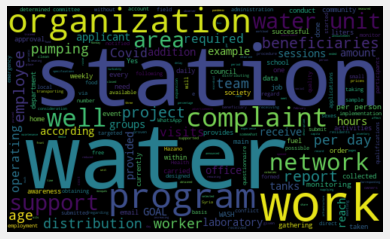

In [39]:
## plot word Cloud
allWords=' '.join([twts for twts in df['Answers1']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear' )
plt.axis('off')
plt.show()

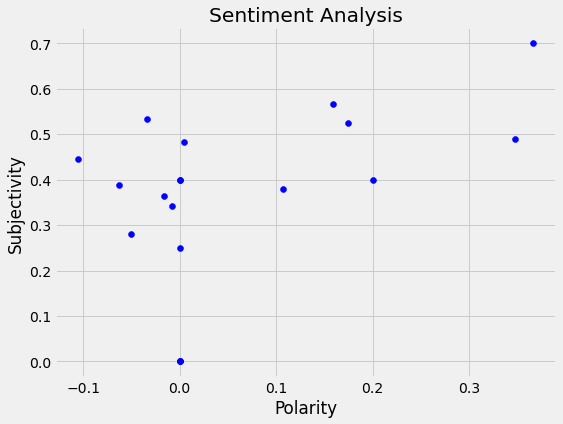

In [40]:
## plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'] 
    [i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

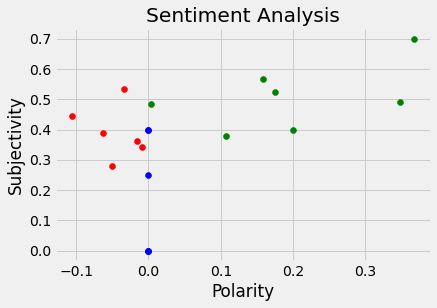

In [41]:
for index,row in df.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

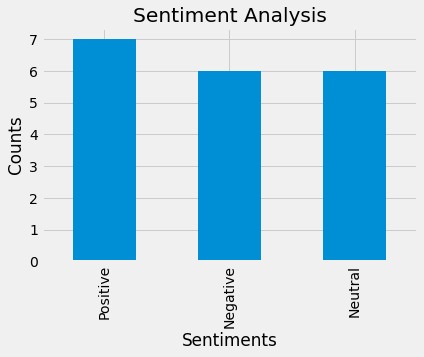

In [42]:
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Answers1']
round((ptweets.shape[0]/df.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
round((ntweets.shape[0]/df.shape[0])*100,1)
## show value counts
df['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


In [43]:
df

,Questions,Answers,Answers1,Subjectivity,Polarity,Analysis
0,Project specific question on the activities 1 \nWhat is the current status of the activities? Which activities do you implement in the field currently? Were there any delays?,"All activities are carried out as required (operating stations - supplying fuel and oils - periodic fuel inventory - following up on maintenance - and following up on infrastructure projects ......)\nDuring the Covid-19 pandemic, field visits to stations were reduced as much as possible and some activities were pursued via WhatsApp, but this did not affect the quality of work and implementation of activities within the required time, meaning there is no delay.\n","All activities are carried out as required (operating stations - supplying fuel and oils - periodic fuel inventory - following up on maintenance - and following up on infrastructure projects ......)\nDuring the Covid-19 pandemic, field visits to stations were reduced as much as possible and some activities were pursued via WhatsApp, but this did not affect the quality of work and implementation of activities within the required time, meaning there is no delay.\n",0.400000,0.000000,Neutral
1,Project specific question on the activities 2 \nHow do you measure the water quality? What is the chain of reporting here?,"There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n","There is a laboratory in the Wash program, as well as a laboratory in every water unit, where samples of water are collected from pumping stations and from the homes of beneficiaries, and the percentage of free remaining chlorine is measured, as well as turbidity and microbial colonies if any, and the measurement is done on a weekly basis. The laboratory employee submits a weekly report on the laboratory's work, and reports are submitted to the administration.\nAs for the per capita water share per day, it is obtained through the pumping data that the stations raise daily for the program every Monday with an amount of 35 liters of water per person.\nOn February 17-2020, Hazano station started pumping water, at a rate of 5 hours per day, and on 20/04/2020 it started increasing the number of pumping hours by 7 hours per day.\n",0.400000,0.200000,Positive
2,"Project specific question on the activities 3 \nHow many Water Unit staff have been trained on operation and maintenance, water pumping data system and complaints response mechanism? How do you select the staff?","Every station has one operating worker or more , and at Hazano station we have three operating employees and a network observer employee (according to the workload within the station and the number of operating hours) In addition to the network monitor, these workers have been trained to record pumping data as well as to receive complaints from beneficiaries and submit them to the organization.\nWhen there is need for employment:\n1) The job (job description with the required qualifications and experience) is announced through the social media pages of the water unit, as well as advertisements in local councils and in front of the mosques.\n2) The applicants place employment applications in a closed box in the water unit.\n3) After the announc

In [44]:
df.to_excel('sentiment.xlsx')